# Exercise 4 | TKO_2096 Applications of Data Analysis 2020
## deadline: 12.2.2020, 23:59 pm

********************************************

Student name: Ismail Elnaggar

Student number: 519208

Student email: imelna@utu.fi

********************************************

## Water permability prediction in forestry <br>

In this task, the client wants you to estimate the spatial prediction performance of K-nearest neighbor regression model with K=5 (5NN), using spatial leave-one-out cross-validation (i.e. SKCV, with number of folds == number of data points). The client wants you to use the C-index as the performance measure.  

In other words, the client wants you to answer the question: "What happens to the prediction performance of water permeability using 5-nearest neighbor regression model, when the geographical distance between known data and unknown data increases?".

In this task, you have three data files available (with 1691 data points): 

- input.csv, contains the 95 predictor features. 
- output.csv, contains the water permebility values. 
- coordinates.csv, contains the corresponding geographical coordinate locations of the data points. The unit of the coordinates is metre, and you can use Euclidean distance to calculate distances between the coordinate points. 

Implement the following tasks to complete this exercise:

********************************************

#### 1. Z-score standardize the predictor features (input.csv). 

#### 2. Perform spatial leave-one-out cross-validation with 5NN model for the provided data set (check the end of the lecture slides for the pseudocode). Estimate the water permeability prediction performance (using 5NN model and C-index) with the following distance parameter values: d = 0, 10, 20, ..., 250 (that is, 10 meter intervals). 

#### 3. When you have calculated the C-index performance measure for each value of d, visualize the results with the C-index (y-axis) as a function of d (x-axis).

********************************************

Your .ipynb-file must include the following: 

- Your own implementation of the spatial leave-one-out cross-validation for the current task. Remember to also take advantage of earlier exercises (e.g. C-index). For the 5-nearest neighbor and Euclidean distance you can use third-party libraries if you want.  


- Plot of the graph C-index vs. distance parameter value. 

<br><br><br>
-- START IMPLEMENTING YOUR EXERCISE AFTER THIS LINE --
<br><br><br>

### Import necessary libraries

In [1]:
# In this cell, import all the libraries that you need. For example: 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from scipy.spatial.distance import cdist

### Read in the datasets

In [2]:
# In this cell, read the files input.csv, output.csv and coordinates.csv.
# Print out the dataset dimesions (i.e. number of rows and columns).
#
# Note that the coordinates are in EUREF-TM35FIN format, so you 
# can use the Euclidean distance to calculate the distance between two coordinate points.

inputdf=pd.read_csv("C:/Users/imelna/anaconda/envs/emgEnv/ADA exercises/Exercise 4 data/input.csv",header=None)
outputdf=pd.read_csv("C:/Users/imelna/anaconda/envs/emgEnv/ADA exercises/Exercise 4 data/output.csv",header=None)
coordf=pd.read_csv("C:/Users/imelna/anaconda/envs/emgEnv/ADA exercises/Exercise 4 data/coordinates.csv",header=None)

print ("The dimensions of the input dataset are:",inputdf.shape,"\n")
print ("The dimensions of the output dataset are:",outputdf.shape,"\n")
print ("The dimensions of the coordinate dataset are:",coordf.shape,"\n")

The dimensions of the input dataset are: (1691, 95) 

The dimensions of the output dataset are: (1691, 1) 

The dimensions of the coordinate dataset are: (1691, 2) 



### Standardization of the predictor features (input.csv)

In [3]:
# Standardize the predictor features (input.csv) by removing the mean and scaling to unit variance. 
# In other words, z-score the predictor features. You are allowed to use third-party libraries for doing this.

cols = list(inputdf.columns)
for col in cols:
    col_zscore = str(col) + "_ZS" #add ZS to each feature name to indicate z score feature
    inputdf[col_zscore] = (inputdf[col] - (inputdf[col].mean()))/(inputdf[col].std(ddof=0))

inputZSDF=inputdf.copy() #copy just to keep original features somewhere
inputZSDF.drop(cols,inplace=True,axis=1) #drop original columns from z-score dataframe

print (inputZSDF.head())

       0_ZS      1_ZS      2_ZS      3_ZS      4_ZS      5_ZS      6_ZS  \
0 -0.272641  0.247478  0.186771  0.175840  0.231291 -0.486200  0.277516   
1 -0.272641 -0.150684 -0.140341 -0.113494 -0.168647 -0.467791 -0.145221   
2  3.667832 -0.578123 -0.595346 -0.574620 -0.621910 -0.467791 -0.629077   
3 -0.272641 -0.507859 -0.474831 -0.502287 -0.461935 -0.688698 -0.481374   
4 -0.272641 -0.821119 -0.853593 -0.809704 -0.915198 -0.651880 -0.924484   

       7_ZS      8_ZS      9_ZS  ...     85_ZS     86_ZS     87_ZS     88_ZS  \
0  0.255260  0.662867  0.225630  ...  0.219541  0.539119 -0.645254 -0.519918   
1 -0.110611  2.080623  2.030569  ...  0.219541 -0.169259 -0.645254  2.475438   
2 -0.606892 -0.500419 -0.341832  ... -1.047724 -0.877636 -0.645254 -0.519918   
3 -0.453540  0.817366  1.032383  ... -1.047724 -0.877636 -0.645254 -0.519918   
4 -0.854429  0.926424  0.355530  ... -1.047724 -0.877636  2.098494  0.977760   

      89_ZS     90_ZS     91_ZS     92_ZS     93_ZS     94_ZS  
0 -0

### Functions

In [4]:
# Include here all the functions (for example the C-index-function) that you need in order to implement the task.

def cindex(true_labels, pred_labels):
    """
    Returns C-index between true labels and predicted labels
    Inputs:
    ------
    true_labels: the true labels associated with the dataset (list)
    pred_labels: the predictions a model returns based on some input data (list)
    
    Outputs:
    ------
    C-Index score    
    """ 
    n = 0
    n_sum = 0
    for i in range(len(true_labels)):
        t = true_labels[i]
        p = pred_labels[i]
        for j in range(i+1,len(true_labels)):
            nt = true_labels[j]
            np = pred_labels[j]
            if t != nt:
                n += 1
                if (p < np and t < nt) or (p > np and t > nt):
                        n_sum +=  1
                elif p == np:
                    n_sum += 0.5     
    return (n_sum/n)

    
def d_check(p1,p2,d):
    """
    Function to check if the distance between two points is smaller or larger than a predefined distance threshold
    Inputs:
    ------
    p1: one pair of x and y coordinates (x,y)
    p2: array of x and y coordinates to check against p1 [(x0,y0),(x1,y1),....]
    d: threshold  distance value to compare to the distance between p1 and p2
    
    Outputs:
    ------
    array of indexes where the distance between p1 and a (x,y) coordinate in p2 is less than the d threshold value    
    """
    
    removed_coord=[]
    for i in range(len(p2)):
        distance = np.sqrt(np.sum((p1 - p2[i]) ** 2, axis=0))
        if d>= distance:
            removed_coord.append(i)
    return np.array(removed_coord)

### Testing d_check function and comparing results to a distance matrix

In [5]:
#test values
mycoordinates=np.array(coordf[[0,1]])
test_coordinate=mycoordinates[797] #pick random coordinate
d=20 # pick random distance value to check against

#test function for d_check
removedcoor=d_check(test_coordinate,mycoordinates,d) #get list of which indexes are selected by d_check function

#get the distances
distancelist=[]
for i in range(len(mycoordinates)):
    distance = np.sqrt(np.sum((test_coordinate - mycoordinates[i]) ** 2, axis=0))
    if d>= distance:
        distancelist.append(distance) 

        
zippedlist=[(x,y) for x,y in zip(removedcoor,distancelist)]
print ("you can see for each index the corresponding distance value is either 20 or smaller, so these coordinates are too close to the test coordinate \n",zippedlist)


you can see for each index the corresponding distance value is either 20 or smaller, so these coordinates are too close to the test coordinate 
 [(775, 20.0), (776, 20.0), (786, 10.0), (787, 10.0), (797, 0.0), (798, 0.0), (808, 10.0), (809, 10.0)]


In [6]:
#create a distance matrix and convert it to a dataframe to use pandas iloc/conditional statement
dist_matrix=cdist(mycoordinates,mycoordinates,'euclidean')
dist_df=pd.DataFrame(dist_matrix)

coordinate_index=797
distance_thresh=20

dmatrix_indices=list(dist_df[dist_df.iloc[:,coordinate_index]<= distance_thresh ].index)

#compare the two lists, should be the same

print ("indicies from using my d_check function:",removedcoor)

print ("indicies from using my distance matrix:",dmatrix_indices)

indicies from using my d_check function: [775 776 786 787 797 798 808 809]
indicies from using my distance matrix: [775, 776, 786, 787, 797, 798, 808, 809]


### Results for spatial leave-one-out cross-validation with 5-nearest neighbor regression model

### I decided not to use my d_check function
1. When using my d_check function the runtime of the entire LOOCV cell took 21 minutes. I felt that it was too slow maybe because I was calling my function in every loop which called the np.sqrt and np.sum functions within my function


2. So instead of calculating distances for every single test data point repeatedly, I create a distance matrix outside the loops at the top of the cell and then for each loop I just check which indices in the corresponding column of the distance matrix contain distance values less than or equal to the threshold distance.


3. This reduced the runtime of the entire cell to 10 minutes on my laptop and produced the same results as my d_check function. There's probably an even better way but this is hopefully good enough haha.


In [8]:
# In this cell, run your script for the Spatial leave-One-Out cross-validation 
# with 5-nearest neighbor regression model and visualize the results as 
# requested in the task assignment.

#constants
k=5
d=list(range(0,260,10))
knn = KNeighborsRegressor(n_neighbors=k)

#to save values
c_index_loo=[]
test_list=[]
pred_list=[]

#coordinates
mycoordinates=np.array(coordf[[0,1]])

#distance matrix where the diag contains 0's 
dist_matrix=cdist(mycoordinates,mycoordinates,'euclidean')
dist_df=pd.DataFrame(dist_matrix) # convert to pandas df so i can use pandas indexing/conditional statements

for dis in d:
    
    
    for i in range(len(inputZSDF)):
        #set x test and y test
        xtest=inputZSDF.iloc[i,:]
        ytest=outputdf.iloc[i,:]        
        #check which coordinates are too close to the test coordinate, this removes the test coordinate itself as well
        removedcoor=list(dist_df[dist_df.iloc[:,i]<= dis ].index)
        #set x train and y train by removing indexes that contain coordinates that are too close to the test coordinate
        xtrain=inputZSDF.drop(removedcoor, axis=0)
        ytrain=outputdf.drop(removedcoor, axis=0)
        
        #train regressor
        knn.fit(xtrain,ytrain)
        #get predictions
        ypred=knn.predict(np.array(xtest).reshape(1, -1))
        #append true and predicted values to lists
        test_list.append(ytest.values)
        pred_list.append(ypred.flatten())
    #calculate c-index score    
    c_index_score=cindex(test_list,pred_list)
    print ("for distance = {0} the C-index = {1}".format(dis,c_index_score))
    #append c-index score for distance = dis
    c_index_loo.append(c_index_score)
    #clear test and pred list for next dis value
    test_list=[]
    pred_list=[]
    
    


for distance = 0 the C-index = 0.7184301631321142
for distance = 10 the C-index = 0.7073291858513374
for distance = 20 the C-index = 0.7077663093616526
for distance = 30 the C-index = 0.7032620823178115
for distance = 40 the C-index = 0.6976267238205365
for distance = 50 the C-index = 0.693692612227699
for distance = 60 the C-index = 0.6926395260447217
for distance = 70 the C-index = 0.6867941802726755
for distance = 80 the C-index = 0.6855605050333949
for distance = 90 the C-index = 0.6845609656054843
for distance = 100 the C-index = 0.6828460695281866
for distance = 110 the C-index = 0.647957733761334
for distance = 120 the C-index = 0.6285237614600555
for distance = 130 the C-index = 0.6174322336066435
for distance = 140 the C-index = 0.6171721993647185
for distance = 150 the C-index = 0.6142005294479155
for distance = 160 the C-index = 0.6154699025239071
for distance = 170 the C-index = 0.6144322154077463
for distance = 180 the C-index = 0.6138467008899261
for distance = 190 the C-

### Interpretation of the results

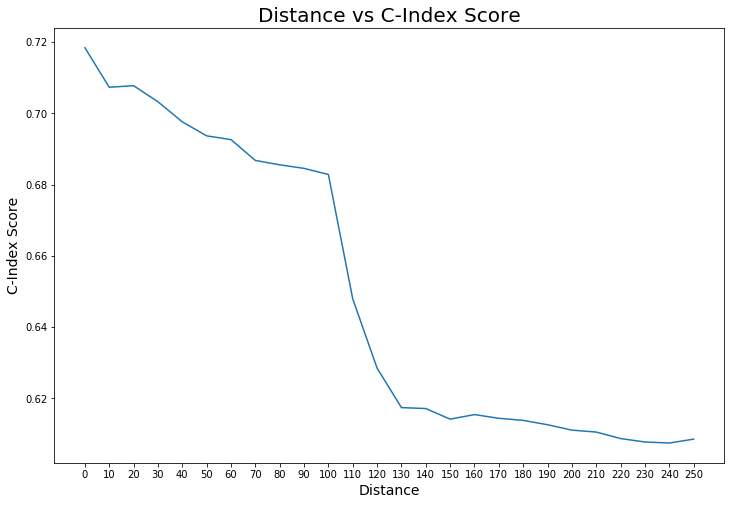

In [9]:
plt.figure(figsize=(12,8))
plt.plot(d,c_index_loo) #distance vs the cindex scores
plt.xlabel("Distance",fontsize=14)
plt.ylabel("C-Index Score",fontsize=14)
plt.title("Distance vs C-Index Score",fontsize=20)
plt.xticks(np.arange(0, 260, step=10))
plt.show()

# In this cell, give a brief commentary on the results, what happens to the prediction  performance as the prediction distance increases?

1. As distance increases the prediction performance decreases. This is due to the fact that as data samples that are close to test data are removed from the training dataset, the performance of the model decreases because those data samples will  exhibit similar soil/enviornmental properties to that of the test data. Removing samples close to the test sample will then better reflect the way the model is used in the application.


2. From 100 to 130 meters there is a significant decrease in prediction performance of almost 9 percent. I'm not a soil expert but depending on where this data was gathered, this could have been in a region where two areas of different soil/enviornmental conditions meet. This also probably depends on how evenly distributed by distance the dataset is.